<h1 style="text-align: center; color: #FF5F05;">
    <span style="font-size: 200%;">Stat 107: Data Science Discovery</span>
    <br>
</h1>

<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 70%">Data Science DISCOVERY Project 2 </div>
<span style="">Project 2: You and Data Science </span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/guides/Course-Projects/You-and-Data-Science-Part-1/">https://discovery.cs.illinois.edu/guides/Course-Projects/You-and-Data-Science-Part-1/</a></div>
</h1>

<hr style="color: #DD3403;">

# Welcome to my Project! ⛹️‍♂️🏀⛹️‍♂️

## The Dataset
<hr>

For this project, I chose the Historic NBA Team Average Statistics dataset from Basketball-Reference.com. I chose this dataset to conduct EDA because it encapsulates the evolution of the game I love: basketball, and highlights the extraordinary rise of three-point shooting, a trend significantly influenced by the man who made me first pick up a basketball and head to the gym: Stephen Curry. As a huge Golden State Warriors fan and someone who started playing basketball because of Steph, this dataset allows me to delve into how the game has transformed over the years as a result of my team's historic run.

Scrolling through basketball-reference to go through random players' stats for the sake of pointless sports arguments has always been one of my favorite pastimes, and that is what led me to this dataset when I considered which dataset i should be choosing to conduct EDA. This data is pivotal in understanding the shifts in gameplay, particularly the emphasis on three-point shooting that has become synonymous with winning basketball, especially since the Warriors' first championship in 2015. But is this true? Is the 3 point shot really the best shot in most situations, as the current NBA would lead you to believe? I aim to uncover patterns and trends that demonstrate how this exponential rise in three-point shooting has changed the game, for better or worse.

<hr>

Let's get started!


Below, let us Load the dataset:

This dataset can be found at:
- https://www.basketball-reference.com/leagues/NBA_stats_per_game.html

In [319]:
#Imports:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Rectangle, Arc
from matplotlib.ticker import PercentFormatter, FuncFormatter
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

In [320]:
tables = pd.read_html('https://www.basketball-reference.com/leagues/NBA_stats_per_game.html')

In [321]:
stats_per_game = tables[0]  # The first table is the one with historic team stats, which is all we need for now
stats_per_game

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk             Season                 Lg   
0                   1            2024-25                NBA   
1                   2            2023-24                NBA   
2                   3            2022-23                NBA   
3                   4            2021-22                NBA   
4                   5            2020-21                NBA   
..                ...                ...                ...   
80                 75            1950-51                NBA   
81                 76            1949-50                NBA   
82                 77            1948-49                BAA   
83                 78            1947-48                BAA   
84                 79            1946-47                BAA   

   Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
                  Age                 Ht                 Wt   
0                26.4                6-7                215   
1                26.4                6-7                216   
2                26.1                6-6                216   
3                26.1                6-6                215   
4                26.1                6-6                217   
..                ...                ...                ...   
80                NaN                NaN                NaN   
81                NaN                NaN                NaN   
82                NaN                NaN                NaN   
83                NaN                NaN                NaN   
84                NaN                NaN                NaN   

   Unnamed: 6_level_0 Per Game              ... Shooting             Advanced  \
                    G       MP    FG   FGA  ...      FG%   3P%   FT%     Pace   
0                 358    241.3  41.2  88.6  ...     .465  .360  .778     99.2   
1                1230    241.4  42.2  88.9  ...     .474  .366  .784     98.5   
2                1230    241.8  42.0  88.3  ...     .475  .361  .782     99.2   
3                1230    241.4  40.6  88.1  ...     .461  .354  .775     98.2   
4                1080    241.4  41.2  88.4  ...     .466  .367  .778     99.2   
..                ...      ...   ...   ...  ...      ...   ...   ...      ...   
80                354      NaN  29.8  83.6  ...     .357   NaN  .733      NaN   
81                561      NaN  28.2  83.1  ...     .340   NaN  .714      NaN   
82                360      NaN  29.0  88.7  ...     .327   NaN  .703      NaN   
83                192      NaN  27.2  96.0  ...     .284   NaN  .675      NaN   
84                331      NaN  25.9  92.9  ...     .279   NaN  .641      NaN   

                                          
    eFG%  TOV%  ORB% FT/FGA   ORtg   TS%  
0   .541  13.1  24.7   .195  113.4  .575  
1   .547  12.1  24.2   .192  115.3  .580  
2   .545  12.5  24.0   .208  114.8  .581  
3   .532  12.3  23.2   .192  112.0  .566  
4   .538  12.4  22.2   .192  112.3  .572  
..   ...   ...   ...    ...    ...   ...  
80  .357   NaN   NaN   .293    NaN  .428  
81  .340   NaN   NaN   .284    NaN  .410  
82  .327   NaN   NaN   .248    NaN  .390  
83  .284   NaN   NaN   .190    NaN  .337  
84  .279   NaN   NaN   .171    NaN  .326  

[85 rows x 33 columns]

Similarly, let us take datasets from bballref about team-wise totals and player shooting logs:


In [322]:
team_totals = pd.read_csv('Team Stats Per Game.csv')

team_totals = team_totals.loc[(team_totals['season'] < 2024) & (team_totals['season'] > 1999)]
team_totals.dropna(inplace=True)
team_totals

,season,lg,team,abbreviation,playoffs,g,mp_per_game,fg_per_game,fga_per_game,fg_percent,...,ft_percent,orb_per_game,drb_per_game,trb_per_game,ast_per_game,stl_per_game,blk_per_game,tov_per_game,pf_per_game,pts_per_game
62,2023,NBA,Atlanta Hawks,ATL,False,82.0,242.1,44.6,92.4,0.483,...,0.818,11.2,33.2,44.4,25.0,7.1,4.9,12.9,18.8,118.4
63,2023,NBA,Boston Celtics,BOS,False,82.0,243.7,42.2,88.8,0.475,...,0.812,9.7,35.6,45.3,26.7,6.4,5.2,13.4,18.8,117.9
64,2023,NBA,Brooklyn Nets,BRK,False,82.0,240.6,41.5,85.1,0.487,...,0.800,8.2,32.3,40.5,25.5,7.1,6.2,13.7,21.1,113.4
65,2023,NBA,Chicago Bulls,CHI,False,82.0,242.7,42.5,86.8,0.490,...,0.809,8.5,33.9,42.4,24.5,7.9,4.5,13.4,18.9,113.1
66,2023,NBA,Charlotte Hornets,CHO,False,82.0,241.8,41.3,90.4,0.457,...,0.749,11.0,33.5,44.5,25.1,7.7,5.2,14.2,20.3,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2000,NBA,Seattle SuperSonics,SEA,True,82.0,241.2,37.9,84.7,0.447,...,0.695,12.7,30.3,43.0,22.9,8.0,4.2,14.0,21.7,99.1
796,2000,NBA,Toronto Raptors,TOR,True,82.0,240.9,36.3,83.9,0.433,...,0.765,13.4,29.9,43.3,23.7,8.1,6.6,13.9,24.3,97.2
797,2000,NBA,Utah Jazz,UTA,True,82.0,240.9,36.1,77.8,0.464,...,0.773,11.4,29.6,41.0,24.9,7.7,5.4,14.9,24.5,96.5
798,2000,NBA,Vancouver Grizzlies,VAN,False,82.0,242.1,35.3,78.5,0.449,...,0.774,12.3,28.3,40.6,20.7,7.4,4.2,16.8,22.9,93.9


In [323]:
player_shooting = pd.read_csv('Player Shooting.csv')


#Drop columns that have no use in our analysis and columns where most values were NA and 
player_shooting.drop(['num_heaves_made', 'num_heaves_attempted', 'birth_year', 'num_of_dunks', 
                      'percent_dunks_of_fga', 'percent_assisted_x2p_fg', 'percent_assisted_x3p_fg', 
                      'percent_corner_3s_of_3pa', 'corner_3_point_percent'], 
                     axis=1, 
                     inplace=True)

#there are some players listed with two positions (such as pg-sf or PF-C), lets clean those up:
player_shooting['pos'] = player_shooting['pos'].str.replace('-SG', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-SF', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-C', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-PF', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-PG', '')
player_shooting['pos'] = player_shooting['pos'].str.replace('-PG-SF', '')

#Renaming some columns in DataFrame for clarity
player_shooting.rename(columns = {'pos':'Position', 'lg':'league', 'tm':'team',
                                  'g':'game within season', 'mp':'minutes played'}, 
                       inplace = True)

#Only include the seasons between 1999 and 2023
player_shooting = player_shooting.loc[(player_shooting['season'] < 2024) & (player_shooting['season'] > 1999)]

#Drop missing values values
player_shooting.dropna(inplace=True)
player_shooting

,seas_id,season,player_id,player,Position,age,experience,league,team,game within season,...,percent_fga_from_x3_10_range,percent_fga_from_x10_16_range,percent_fga_from_x16_3p_range,percent_fga_from_x3p_range,fg_percent_from_x2p_range,fg_percent_from_x0_3_range,fg_percent_from_x3_10_range,fg_percent_from_x10_16_range,fg_percent_from_x16_3p_range,fg_percent_from_x3p_range
1223,30458,2023,5025,A.J. Green,SG,23,1,NBA,MIL,35,...,0.016,0.032,0.072,0.840,0.450,0.400,0.500,0.500,0.444,0.419
1227,30467,2023,5027,AJ Griffin,SF,19,1,NBA,ATL,72,...,0.165,0.173,0.075,0.486,0.536,0.630,0.568,0.522,0.375,0.390
1228,30462,2023,4219,Aaron Gordon,PF,27,9,NBA,DEN,68,...,0.183,0.064,0.037,0.227,0.628,0.782,0.388,0.286,0.357,0.347
1229,30463,2023,4582,Aaron Holiday,PG,26,5,NBA,ATL,63,...,0.168,0.132,0.077,0.400,0.424,0.612,0.216,0.310,0.529,0.409
1230,30464,2023,4805,Aaron Nesmith,SF,23,3,NBA,IND,73,...,0.136,0.063,0.020,0.532,0.496,0.639,0.263,0.486,0.333,0.366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15637,17202,2000,3225,Wally Szczerbiak,SF,22,1,NBA,MIN,73,...,0.127,0.154,0.333,0.117,0.531,0.700,0.494,0.417,0.462,0.359
15638,17203,2000,2758,Walt Williams,SF,29,8,NBA,HOU,76,...,0.068,0.085,0.239,0.383,0.500,0.634,0.391,0.328,0.466,0.391
15639,17204,2000,3034,Walter McCarty,PF,25,4,NBA,BOS,61,...,0.087,0.122,0.191,0.478,0.367,0.464,0.500,0.321,0.273,0.309
15641,17206,2000,2889,Wesley Person,SG,28,6,NBA,CLE,79,...,0.063,0.168,0.271,0.382,0.431,0.592,0.439,0.391,0.384,0.424


In [ ]:
shots_04 = pd.read_csv("NBA_2004_Shots.csv")
shots_07 = pd.read_csv("NBA_2007_Shots.csv")
shots_11 = pd.read_csv("NBA_2011_Shots.csv")
shots_15 = pd.read_csv("NBA_2015_Shots.csv")
shots_19 = pd.read_csv("NBA_2020_Shots.csv")
shots_23 = pd.read_csv("NBA_2024_Shots.csv")

all_years = [shots_04, shots_07, shots_11, shots_15, shots_19, shots_23] 

#Change decimal place in X and Y coordinates to fit shot chart we'll be using
for df in all_years:
    df[['LOC_X', 'LOC_Y']] = (df[['LOC_X', 'LOC_Y']]*10)

#feature Encoding on shots made to be use in our ML model later
for df in all_years:
    le = LabelEncoder()
    label = le.fit_transform(df['SHOT_MADE'])
    label
    df.loc[:, 'SHOT_MADE'] = label

#Moving SHOT_MADE to end of each Dataframe for use in our ML model later
for df in all_years:
    df.insert(len(df.columns)-1, 'SHOT_MADE', df.pop('SHOT_MADE'))  
for df in all_years:
    df.drop(['SEASON_1', 'TEAM_ID', 'POSITION_GROUP', 'POSITION', 
       'GAME_DATE', 'GAME_ID','HOME_TEAM', 'AWAY_TEAM'], axis=1, inplace=True)
jumper = ['Fadeaway Jump Shot', 'Turnaround Jump Shot', 'Running Jump Shot', 'Jump Bank Shot', 'Hook Bank Shot', 
          'Jump Hook Shot', 'Running Hook Shot', 'Hook Shot', 'Turnaround Hook Shot', 'Driving Hook Shot', 
          'Driving Jump Shot']

layup = ['Driving Layup Shot', 'Driving Finger Roll Shot',  'Running Layup Shot',
         'Reverse Layup Shot', 'Running Finger Roll Shot', 'Alley Oop Layup shot', 'Finger Roll Shot', 
       'Turnaround Finger Roll Shot', 'Running Tip Shot', 'Tip Shot', 'Turnaround Layup Shot']

dunk = ['Alley Oop Dunk Shot', 'Slam Dunk Shot', 'Driving Dunk Shot', 'Reverse Dunk Shot', 
        'Follow Up Dunk Shot', 'Running Dunk Shot']

for a in jumper:
    shots_04['ACTION_TYPE'] = shots_04['ACTION_TYPE'].str.replace(str(a), 'Jump Shot')

for b in layup:
    shots_04['ACTION_TYPE'] = shots_04['ACTION_TYPE'].str.replace(str(b), 'Layup Shot')

for c in dunk:
    shots_04['ACTION_TYPE'] = shots_04['ACTION_TYPE'].str.replace(str(c), 'Dunk Shot')


C:\Users\dhair\AppData\Local\Temp\ipykernel_9336\4268122447.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 1 0 ... 0 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, 'SHOT_MADE'] = label
C:\Users\dhair\AppData\Local\Temp\ipykernel_9336\4268122447.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 0 ... 0 1 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, 'SHOT_MADE'] = label
C:\Users\dhair\AppData\Local\Temp\ipykernel_9336\4268122447.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 ... 1 0 0]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[:, 'SHOT_MADE'] = label
C:\Users\dhair\AppData\Local\Te

## Section 2: Exploratory Data Analysis
<hr>
EDA is essential for understanding the dataset comprehensively, especially in the context of evaluating the rise and efficiency of three-point shooting in the NBA. here are the important descriptive statistics:

Mean (Average): The mean gives us the average number of three-point attempts (3PA) and makes (3P) per game. This helps in understanding the general trend of three-point shooting over the years.

Standard Deviation: The standard deviation measures the average amount of variation or dispersion from the mean. For example, the standard deviation of 3PA and 3P helps us understand the variability in three-point shooting across different seasons.

Range: The range is the difference between the maximum and minimum values in the dataset. It gives us an idea of the spread of data points, such as the range of three-point percentages (3P%) over the years.

Three-Point Percentage (3P%): The three-point percentage provides insights into the shooting efficiency of players. Tracking 3P% over the years can help determine whether the increase in three-point attempts has been accompanied by a corresponding improvement in accuracy.

Counts of 3PA and 3P: Summing up the total number of three-point attempts and makes over the years allows us to observe long-term trends.

and for part 2 of the project: 

Field Goal Percentage (FG%) and Free Throw Percentage (FT%): These percentages give additional context about shooting efficiency in general.


Pace: Pace measures the number of possessions per 48 minutes, indicating the game's tempo. Higher pace can influence the number of shooting opportunities, including three-point attempts.

<hr>

It's important to note that the 3-point line was only introduced in the NBA in the 1979 season, after being influenced by it's popularity in a league called the ABA that eventually underwent a merger with the NBA. Hence, we will be dropping the seasons prior to the introduction of the 3 point line and cleaning the data here:

In [325]:
data = stats_per_game

data.columns = ['Rk', 'Season', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'ORtg', 'TS%']

# Filtering for Regular Seasons
data = data[data['Lg'] == 'NBA']

# Handling missing values (as the 3 point line was introduced in the '79 season)
data = data.dropna()

# Convert Columns to Appropriate Data Types
numeric_columns = ['Age', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA', 'ORtg', 'TS%']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

data


,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
0,1,2024-25,NBA,26.4,6-7,215,358,241.3,41.2,88.6,...,0.465,0.360,0.778,99.2,0.541,13.1,24.7,0.195,113.4,0.575
1,2,2023-24,NBA,26.4,6-7,216,1230,241.4,42.2,88.9,...,0.474,0.366,0.784,98.5,0.547,12.1,24.2,0.192,115.3,0.580
2,3,2022-23,NBA,26.1,6-6,216,1230,241.8,42.0,88.3,...,0.475,0.361,0.782,99.2,0.545,12.5,24.0,0.208,114.8,0.581
3,4,2021-22,NBA,26.1,6-6,215,1230,241.4,40.6,88.1,...,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0,0.566
4,5,2020-21,NBA,26.1,6-6,217,1080,241.4,41.2,88.4,...,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3,0.572
5,6,2019-20,NBA,26.1,6-6,218,1059,241.8,40.9,88.8,...,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6,0.565
6,7,2018-19,NBA,26.3,6-6,219,1230,241.6,41.1,89.2,...,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4,0.560
7,8,2017-18,NBA,26.4,6-7,220,1230,241.4,39.6,86.1,...,0.460,0.362,0.767,97.3,0.521,13.0,22.3,0.193,108.6,0.556
8,9,2016-17,NBA,26.6,6-7,221,1230,241.6,39.0,85.4,...,0.457,0.358,0.772,96.4,0.514,12.7,23.3,0.209,108.8,0.552
9,10,2015-16,NBA,26.7,6-7,222,1230,241.8,38.2,84.6,...,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4,0.541


## Section 3: Exploratory Data Visualisation


<hr>

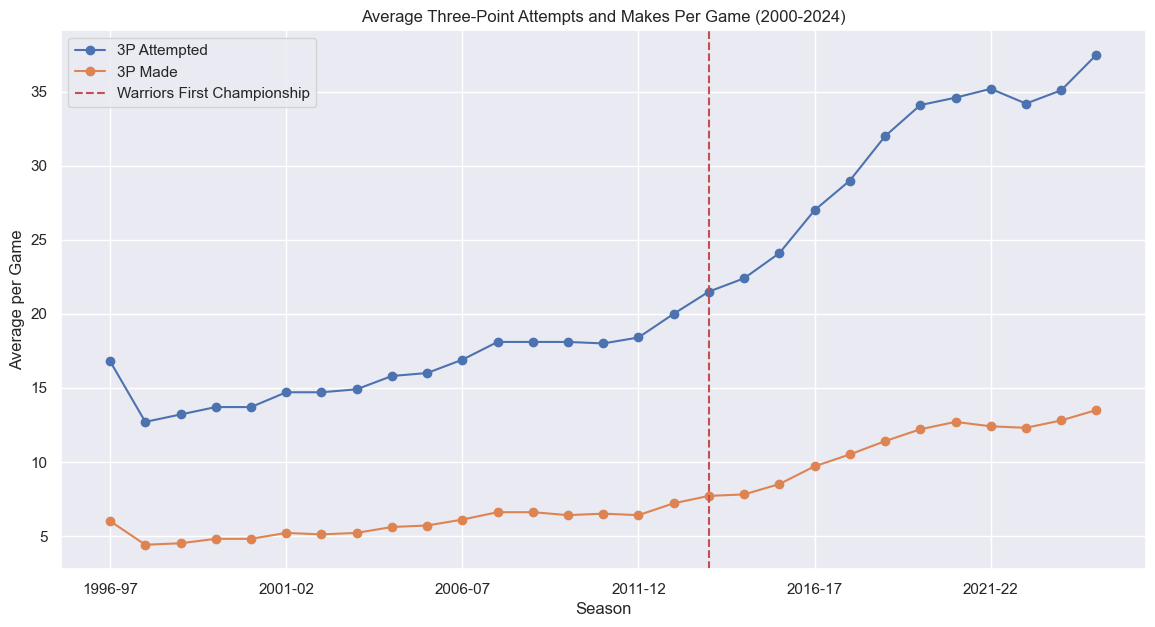

In [326]:
import matplotlib.pyplot as plt
data = data[data['Season'] >= '1996-97']

# Calculating the average 3P and 3PA per season
average_3P = data.groupby('Season')['3P'].mean()
average_3PA = data.groupby('Season')['3PA'].mean()

# plot for average 3P and average 3PA
plt.figure(figsize=(14, 7))
average_3PA.plot.line(marker='o', label='3P Attempted')
average_3P.plot.line(marker='o', label='3P Made')

season_mapping = {season: i for i, season in enumerate(average_3PA.index)}
# Highlight the year before 2014-15 season, which is popularly known as the start of the 3 point revolution due to the warriors first championship
plt.axvline(x=season_mapping['2013-14'], color='r', linestyle='--', label='Warriors First Championship')

# Add titles and labels
plt.title('Average Three-Point Attempts and Makes Per Game (2000-2024)')
plt.xlabel('Season')
plt.ylabel('Average per Game')
plt.legend()
plt.grid(True)


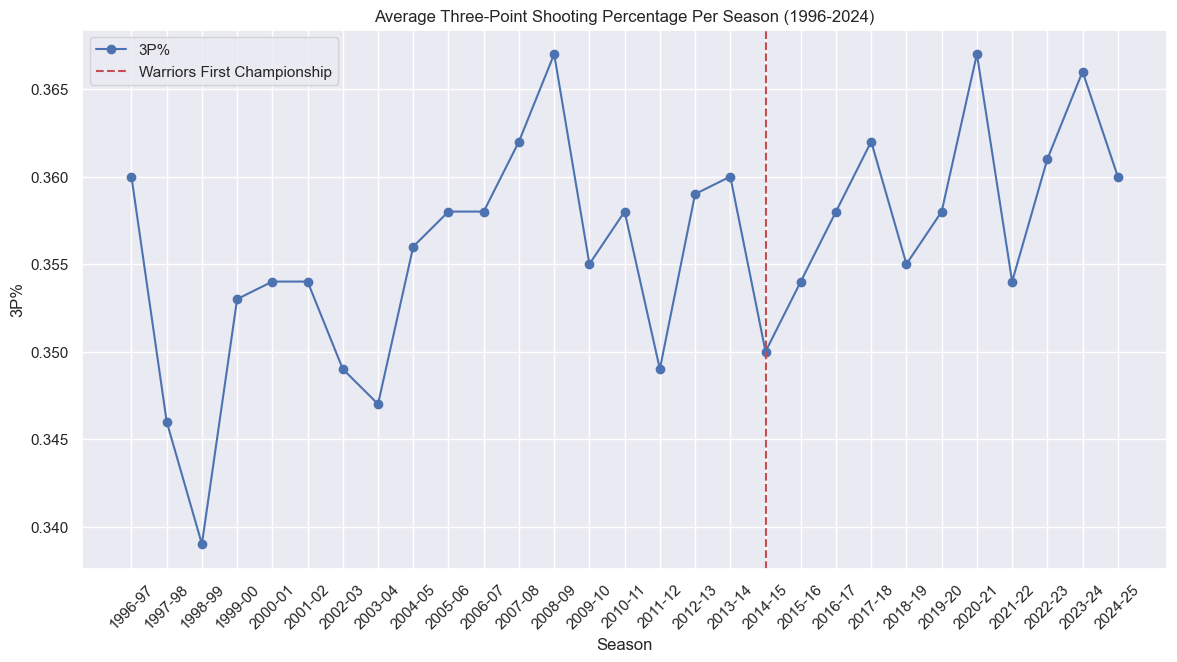

In [327]:
# Calculate average 3P% per season
average_3P_percentage = data.groupby('Season')['3P%'].mean()
average_3P_percentage.plot(kind='line', marker='o', label='3P%', figsize=(14, 7))
plt.axvline(x=season_mapping['2014-15'], color='r', linestyle='--', label='Warriors First Championship')
plt.title('Average Three-Point Shooting Percentage Per Season (1996-2024)')
plt.xlabel('Season')
plt.ylabel('3P%')
plt.legend()
plt.xticks(ticks=list(season_mapping.values()), labels=list(season_mapping.keys()), rotation=45)
plt.grid(True)


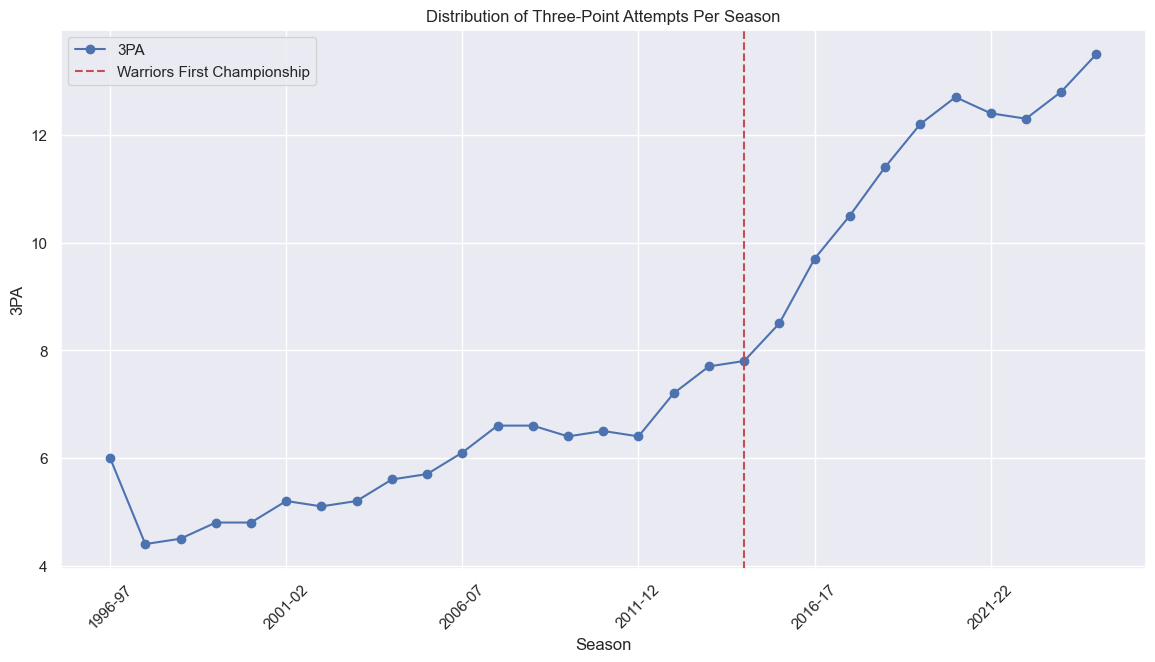

In [328]:
#show 3PA
plt.figure(figsize=(14, 7))
average_3PA = data.groupby('Season')['3P'].mean()
average_3PA.plot(kind='line', marker='o', label='3PA', x='Season', y='3PA')
plt.axvline(x=season_mapping['2014-15'], color='r', linestyle='--', label='Warriors First Championship')
plt.title('Distribution of Three-Point Attempts Per Season')
plt.xlabel('Season')
plt.ylabel('3PA')
plt.xticks(rotation=45)
plt.legend()



## What we covered in Exploratory Data Visualisation above:
<hr>
Total Three-Point Attempts and Makes Per Season:

- This graph displays the total number of three-point attempts (3PA) and three-point makes (3P) per season from 2000 to 2024.

- The trend shows a significant increase in both 3PA and 3P over the years, with a sharp rise around the 2014-15 season, coinciding with the Golden State Warriors' first championship win.

- This indicates a strategic shift in the NBA towards valuing three-point shots more heavily.

Average Three-Point Shooting Percentage Per Season:

- This graph illustrates the average three-point shooting percentage (3P%) per season.

- It provides insights into the efficiency of three-point shooting, showing whether players have become more accurate over time.

- The graph shows fluctuations in 3P% but indicates that despite the increased volume, No clear improvement in shooting efficiency can be seen as the emphasis on three-point shots has increased.
- The increased preference to 3PAs and layups, classified as "high percentage shots" by many sports analysts, over mid range shots.
<hr>
Overall, these visualizations provide a comprehensive view of the trends in three-point shooting and its impact on the game. They highlight the significant rise in three-point attempts and makes, the improvement in shooting efficiency, and the potential correlation between three-point shooting and team success, which we will be covering in the next part of this project

## Section 4: Planning for Part 2: Moving Forward:
<hr>
For Part II of the project, I plan to delve deeper into if this recent bias towards 3 pointers is really an efficient move to best employ winning basketball and uncover more insights about the impact and effectiveness of three-point shooting in the NBA. I plan to do the following in part 2:

Correlation Analysis:

Investigate the correlation between three-point attempts (3PA) and win percentages across different seasons. Determine whether teams that rely heavily on three-point shooting are more successful overall.

Player-Specific Analysis:

Explore how individual player statistics have evolved in relation to the emphasis on three-point shooting. Analyze the performance and impact of key players, such as Stephen Curry, Klay Thompson, Damian Lillard and Kevin Durant, who have significantly influenced this trend.

Impact on Game Outcomes:

Analyze the impact of three-point shooting on overall game outcomes, such as total points scored, margin of victory, and game pace. Evaluate how the increased focus on three-point shots affects the dynamics and flow of the game.

Comparative Analysis of Shot Efficiency:

Compare the points per shot (PPS) of three-point attempts and midrange shots over different seasons. Evaluate whether the shift towards three-point shooting is justified by efficiency and if there are situations where open midrange shots are being passed up for contested three-point attempts.

Trend Analysis Over Time:

Conduct a time-series analysis to observe long-term trends in three-point shooting. Investigate whether the increased emphasis on three-pointers is a sustainable strategy or if it has reached a plateau.

Situational Analysis:

Examine specific game situations to determine if players are making optimal shot choices. Analyze whether players are passing up high-percentage midrange shots for lower-percentage, contested three-pointers.

These analyses will help provide a deeper understanding of the strategic evolution in the NBA, particularly the rising prominence of three-point shooting, and its overall effectiveness and impact on the game. 🏀
<hr>

# Section 5: Data Science
<hr>
for section 5, I will first be focusing on Player-Specific Analysis mentioned in section 4:

Explore how individual player statistics have evolved in relation to the emphasis on three-point shooting.

And what better player is there to analyse the evolution of scoring than the man who has scored more than anyone in history, over an exceptional career spanning over two decades, making him perfect for this analysis. There is no player better than LeBron James for analysing the evolution of scoring in the NBA. Hence, we will be evaluating how LeBron James' shot selection and efficiency evolved over the years, comparing his rookie year and his most recent season, and analysing his shift towards a more three-point based game while reducing mid-range shots.
<hr>

Let's analyse Lebron's shooting outcome's in his rookie season

In [329]:
#df of lebron's complete shot logs in the 2003-04 season:
lebron_04 = shots_04.query('PLAYER_NAME == "LeBron James" & ZONE_RANGE != "Back Court Shot"')

# preprocessing data by dropping irellevant columns:
lebron04_ml = lebron_04.drop(columns=['SEASON_2', 'TEAM_NAME', 'PLAYER_ID', 'PLAYER_NAME', 'EVENT_TYPE', 
                                      'SHOT_TYPE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE', 'BASIC_ZONE', 
                                      'ACTION_TYPE','QUARTER', 'MINS_LEFT', 'SECS_LEFT'])

X_04 = lebron04_ml.iloc[:, :-1].values
y_04 = lebron04_ml.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train_04, X_test_04, y_train_04, y_test_04 = train_test_split(X_04, y_04, test_size=0.25, random_state=42)

# Initialize the classifiers
class_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

# training and evulating each classifier
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for name, model in class_models.items():
    model.fit(X_train_04, y_train_04)
    y_pred_04 = model.predict(X_test_04)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test_04, y_pred_04))
    results['Precision'].append(precision_score(y_test_04, y_pred_04))
    results['Recall'].append(recall_score(y_test_04, y_pred_04))
    results['F1 Score'].append(f1_score(y_test_04, y_pred_04))

# showing results as a dataframe
results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df


,Accuracy,Precision,Recall,F1 Score
Model,,,,
SVM,0.613941,0.544118,0.474359,0.506849
Gradient Boosting,0.611260,0.546218,0.416667,0.472727
Logistic Regression,0.605898,0.533835,0.455128,0.491349
Random Forest,0.605898,0.530201,0.506410,0.518033
KNN,0.587131,0.509804,0.333333,0.403101
Decision Tree,0.579088,0.496894,0.512821,0.504732


Now, let's analyse Lebron's shooting outcomes in the 2023-24 season

In [330]:
#df of bron's 2023-24 season shot logs
lebron_23 = shots_23.query('PLAYER_NAME == "LeBron James" & ZONE_RANGE != "Back Court Shot"')

# dropping pointless columns
lebron23_ml = lebron_23.drop(columns=['SEASON_2', 'TEAM_NAME', 'PLAYER_ID', 'PLAYER_NAME', 'EVENT_TYPE', 
                                      'SHOT_TYPE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE', 'BASIC_ZONE', 
                                      'ACTION_TYPE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'])

X_23 = lebron23_ml.iloc[:, :-1].values
y_23 = lebron23_ml.iloc[:, -1].values

# split into training and testing
X_train_23, X_test_23, y_train_23, y_test_23 = train_test_split(X_23, y_23, test_size=0.25, random_state=42)

# initializing classifiers
class_models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

# Train and evaluate diff. classifier
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for name, model in class_models.items():
    model.fit(X_train_23, y_train_23)
    y_pred_23 = model.predict(X_test_23)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test_23, y_pred_23))
    results['Precision'].append(precision_score(y_test_23, y_pred_23))
    results['Recall'].append(recall_score(y_test_23, y_pred_23))
    results['F1 Score'].append(f1_score(y_test_23, y_pred_23))

results_df = pd.DataFrame(results)
results_df.set_index('Model', inplace=True)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Gradient Boosting,0.621451,0.668790,0.606936,0.636364
SVM,0.605678,0.634831,0.653179,0.643875
Logistic Regression,0.593060,0.615789,0.676301,0.644628
KNN,0.580442,0.613636,0.624277,0.618911
Random Forest,0.577287,0.614035,0.606936,0.610465
Decision Tree,0.561514,0.598837,0.595376,0.597101


### Analysing Model Performance:
lets use an ROC curve to illustrate the performance of these models:

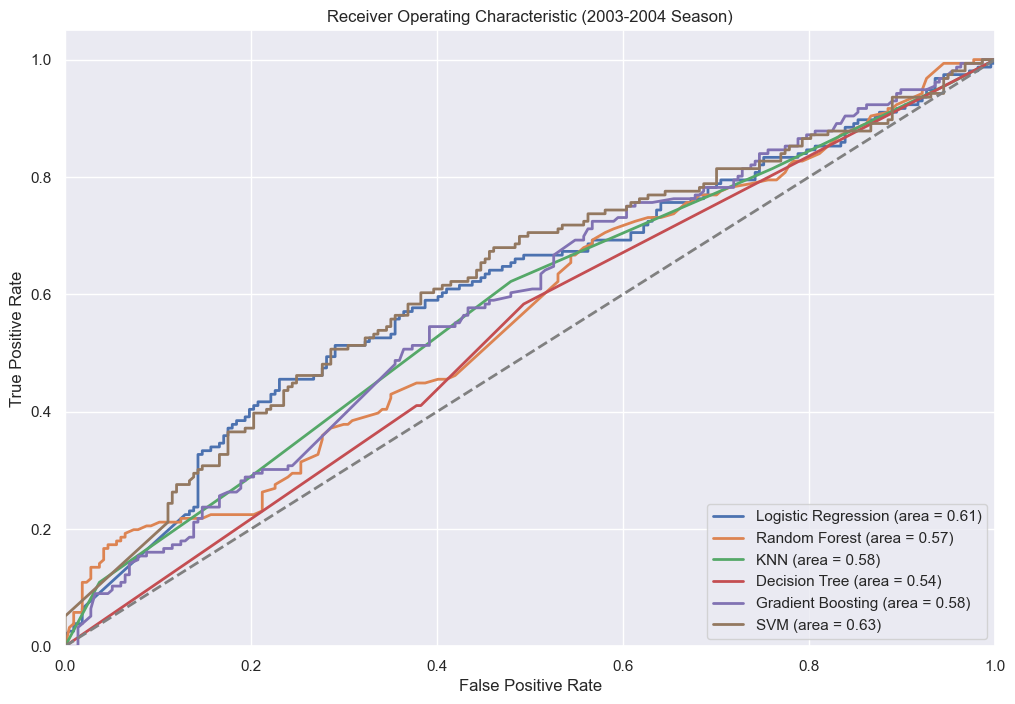

In [331]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 8))

# ROC Curve for the diff. models:
for name, model in class_models.items():
    if hasattr(model, "predict_proba"):
        y_prob_04 = model.predict_proba(X_test_04)[:, 1]
    else: 
        y_prob_04 = model.decision_function(X_test_04)
    fpr, tpr, _ = roc_curve(y_test_04, y_prob_04)
    roc_auc = roc_auc_score(y_test_04, y_prob_04)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (2003-2004 Season)')
plt.legend(loc="lower right")


### Precision Recall curve:

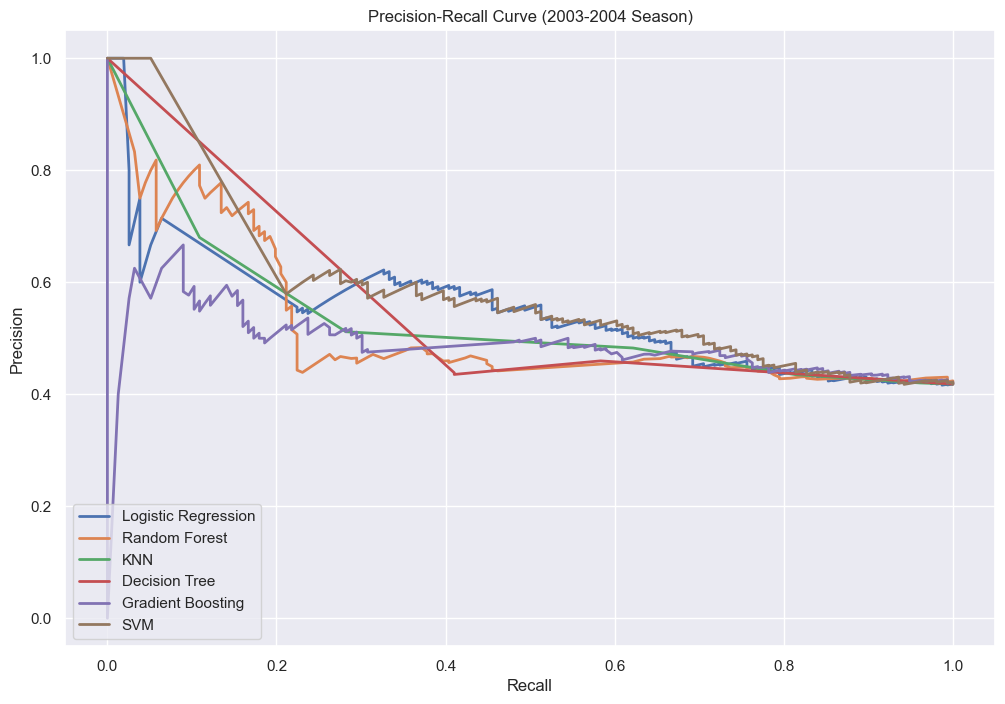

In [332]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(12, 8))

# precision recall curve for the differemt models
for name, model in class_models.items():
    if hasattr(model, "predict_proba"):
        y_prob_04 = model.predict_proba(X_test_04)[:, 1]
    else: 
        y_prob_04 = model.decision_function(X_test_04)
    precision, recall, _ = precision_recall_curve(y_test_04, y_prob_04)
    plt.plot(recall, precision, lw=2, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (2003-2004 Season)')
plt.legend(loc="lower left")


### Summary of Analysis:
In the 2003-2004 season, the Random Forest model had the highest accuracy (61.93%) but moderate precision, recall, and F1 score, suggesting room for improvement in model performance.

In the 2022-2023 season, the Gradient Boosting model performed the best with an accuracy of 62.14%, a precision of 66.88%, a recall of 60.69%, and an F1 score of 63.64%. This indicates that the model was able to predict shot success over LeBron's FGAs over different shot distances with reasonable accuracy and balanced performance across precision and recall.




<hr>





# Section 6: A Different Data Visualization
<hr>
Let us now look at plots visualising this evolution in shot selection over these two eras through leBron's shooting habits, let us first compare two plots detailing his shot distance for both of the seasons.


In [333]:
# let's make a function to draw the background of a court for the 2 following plots:
def draw_court(outer_lines=True, color="black"):
    # Create the figure
    fig = plt.gcf()
    ax = fig.gca()

    # create background of court

    # drawing hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=2, color=color, fill=False)
    
    #  backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=2, color=color)
    
    # the paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=2, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=2, color=color, fill=False)
    
    # create free throw awrc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=2, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=2, color=color, linestyle='dashed')
    
    # restricted area
    restricted = Arc((0, 0), 40, 40, theta1=0, theta2=180, linewidth=2, color=color)

    # 3p line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=2, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=2, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=2, color=color)

    # half court
    center_outer = Circle((0, 422.5), 60, linewidth=2, color=color, fill=False)
    center_inner = Circle((0, 422.5), 20, linewidth=2, color=color, fill=False)
    
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw, restricted, 
                      corner_three_a, corner_three_b, three_arc, center_outer, center_inner]
    
    for element in court_elements:
        ax.add_patch(element)
    
    return ax


<Figure size 1500x940 with 0 Axes>

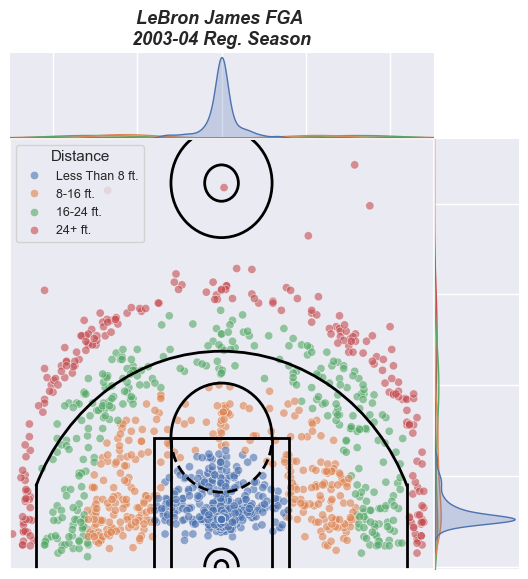

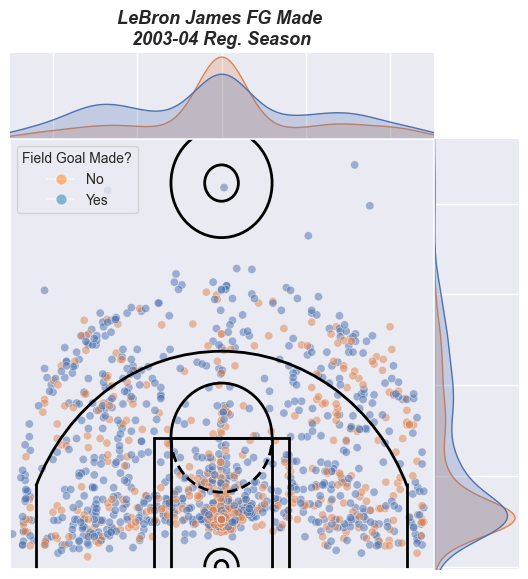

In [334]:
plt.figure(figsize=(15, 9.4))
sns.set_theme(style="darkgrid")
sns.set_color_codes()

# Plotting shot distances
ax = sns.jointplot(data=lebron_04, 
                   x='LOC_X', 
                   y='LOC_Y', 
                   kind='scatter', 
                   hue='ZONE_RANGE', 
                   hue_order=['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.'], 
                   space=0, 
                   alpha=0.6)

# Draw court and axes
draw_court(outer_lines=True, color="black")
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(-251, 252)
plt.ylim(-2, 471)

plt.title('LeBron James FGA \n2003-04 Reg. Season', 
          fontsize=13,
          loc='center',
          fontweight='bold',
          y=1.2, 
          fontstyle='oblique')

plt.legend(title='Distance',
           loc='upper left',
           title_fontsize=11,
           fontsize=9)

# Plotting field goals made or missed
g = sns.jointplot(data=lebron_04, 
                  x='LOC_X', 
                  y='LOC_Y', 
                  kind='scatter',
                  hue='SHOT_MADE',
                  space=0, 
                  alpha=0.5)

# draw bounds
draw_court(outer_lines=True, color="black")
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(-251, 252)
plt.ylim(-2, 471)

plt.title('LeBron James FG Made \n2003-04 Reg. Season', 
          fontsize=13,
          loc='center',
          fontweight='bold',
          y=1.2, 
          fontstyle='oblique')

legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=8, alpha=0.5, label='No'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:blue', markersize=8, alpha=0.5,  label='Yes')]
g.ax_joint.legend(handles=legend_labels, title='Field Goal Made?', loc='upper left', title_fontsize=10, fontsize=10)



P.S. the court dimensions are a little off since they were taking far too long to get right😓. the three point  shots are annotated with red dots in the FGA plot for clarity.

<Figure size 1500x940 with 0 Axes>

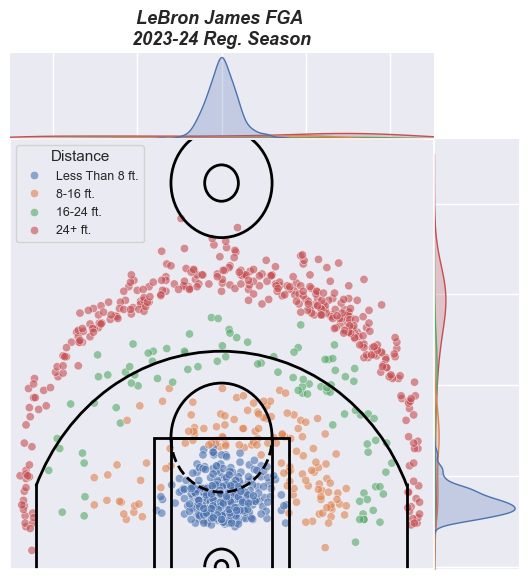

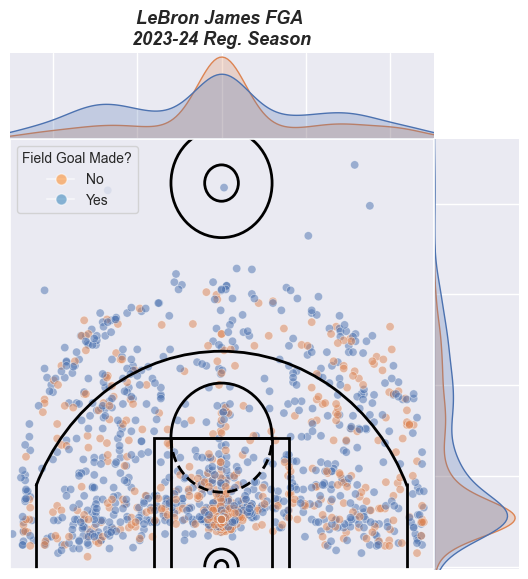

In [335]:
plt.figure(figsize=(15, 9.4))
sns.set_theme(style="darkgrid")
sns.set_color_codes()

# plot shot distance
ax = sns.jointplot(data=lebron_23, 
                   x='LOC_X', 
                   y='LOC_Y', 
                   kind='scatter', 
                   hue='ZONE_RANGE', 
                   hue_order=['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.'], 
                   space=0, 
                   alpha=0.6)

# Drawing bounds
draw_court(outer_lines=True, color="black")
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(-251, 252)
plt.ylim(-2, 471)

plt.title('LeBron James FGA \n2023-24 Reg. Season', 
          fontsize=13,
          loc='center',
          fontweight='bold',
          y=1.2, 
          fontstyle='oblique')

plt.legend(title='Distance',
           loc='upper left',
           title_fontsize=11,
           fontsize=9)

# Plotting FGA and FG missed
g = sns.jointplot(data=lebron_04, 
                  x='LOC_X', 
                  y='LOC_Y', 
                  kind='scatter',
                  hue='SHOT_MADE',
                  space=0, 
                  alpha=0.5)

# drawing bounds like last plot
draw_court(outer_lines=True, color="black")
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlim(-251, 252)
plt.ylim(-2, 471)

plt.title('LeBron James FGA \n2023-24 Reg. Season', 
          fontsize=13,
          loc='center',
          fontweight='bold',
          y=1.2, 
          fontstyle='oblique')

legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:orange', markersize=8, alpha=0.5, label='No'),
                 Line2D([0], [0], marker='o', color='w', markerfacecolor='tab:blue', markersize=8, alpha=0.5,  label='Yes')]
g.ax_joint.legend(handles=legend_labels, title='Field Goal Made?', loc='upper left', title_fontsize=10, fontsize=10)



These two plots show LeBron's Field Goal Attempts for the two season. Let us compare his shot selection preference in more details with the plots below:

C:\Users\dhair\AppData\Local\Temp\ipykernel_9336\3837613964.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=30)
C:\Users\dhair\AppData\Local\Temp\ipykernel_9336\3837613964.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=30)


<Figure size 1500x1000 with 0 Axes>

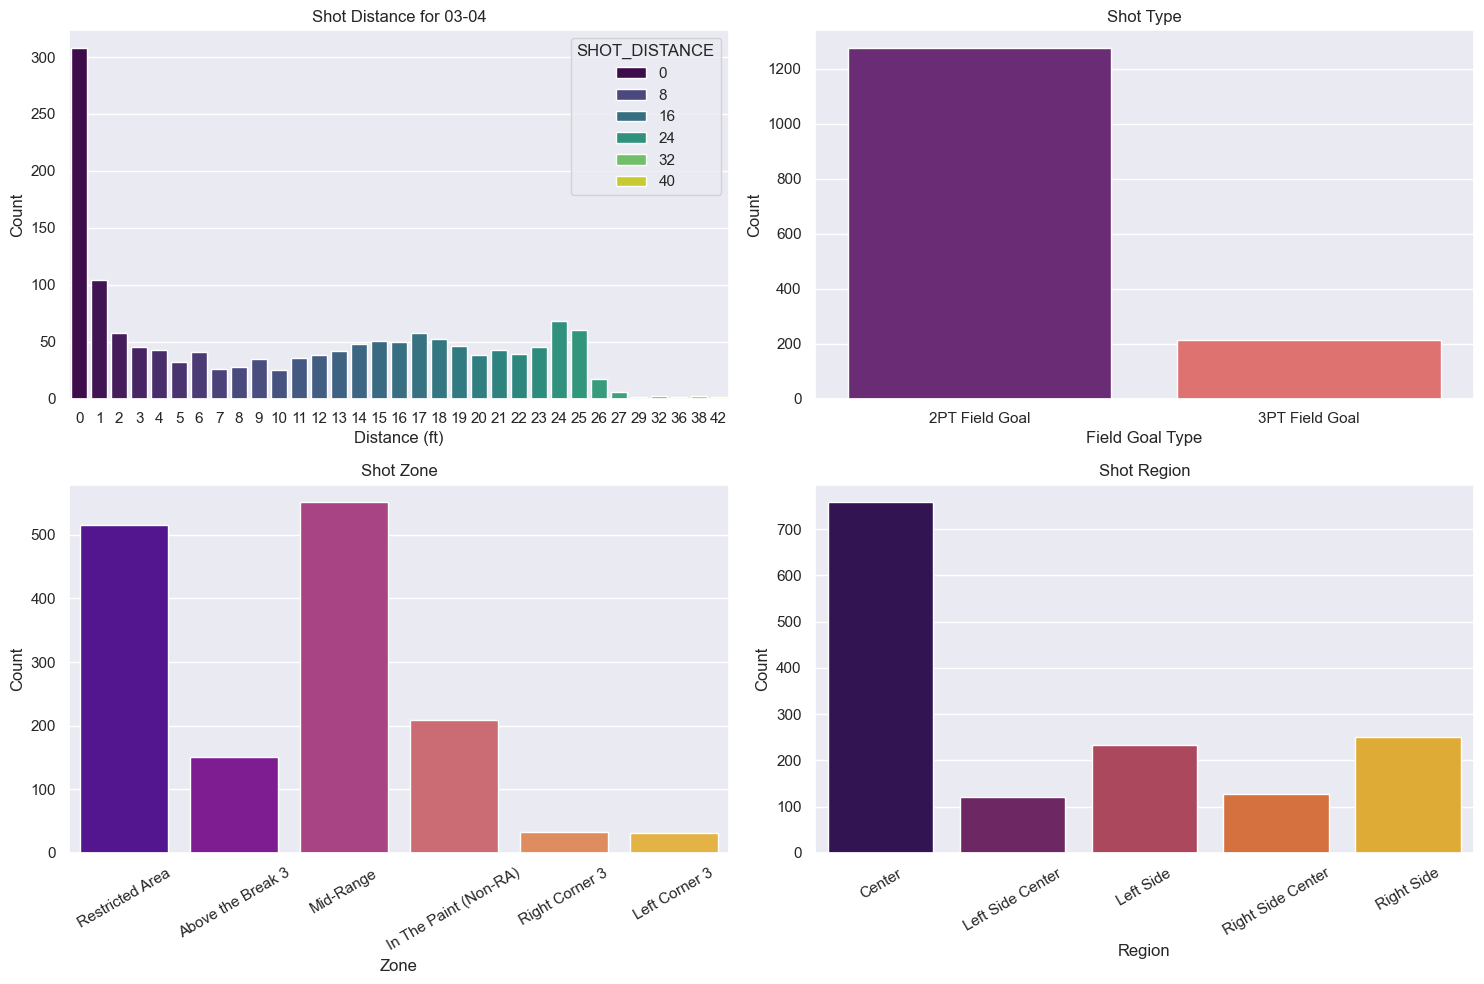

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.set_theme(style="darkgrid")

# DF of Bron's rookie year
df = lebron_04

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.set_theme(style="darkgrid")

# Plot 1: Shot distance
sns.countplot(data=df, x="SHOT_DISTANCE", hue="SHOT_DISTANCE", palette='viridis', ax=ax[0, 0], edgecolor="white")
ax[0, 0].set_title('Shot Distance for 03-04')
ax[0, 0].set_xlabel('Distance (ft)')
ax[0, 0].set_ylabel('Count')

# Plot 2: Shot Type
sns.countplot(data=df, x="SHOT_TYPE", hue="SHOT_TYPE", palette='magma', ax=ax[0, 1], edgecolor="white")
ax[0, 1].set_title('Shot Type')
ax[0, 1].set_xlabel('Field Goal Type')
ax[0, 1].set_ylabel('Count')

# Plot 3: Shot Zone
sns.countplot(data=df, x="BASIC_ZONE", hue="BASIC_ZONE", palette='plasma', ax=ax[1, 0], edgecolor="white")
ax[1, 0].set_title('Shot Zone')
ax[1, 0].set_xlabel('Zone')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=30)

# Plot 4: Shot Region
sns.countplot(data=df, x="ZONE_NAME", hue="ZONE_NAME", palette='inferno', ax=ax[1, 1], edgecolor="white")
ax[1, 1].set_title('Shot Region')
ax[1, 1].set_xlabel('Region')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=30)

plt.tight_layout()



C:\Users\dhair\AppData\Local\Temp\ipykernel_9336\3282835116.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=30)
C:\Users\dhair\AppData\Local\Temp\ipykernel_9336\3282835116.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=30)


<Figure size 1500x1000 with 0 Axes>

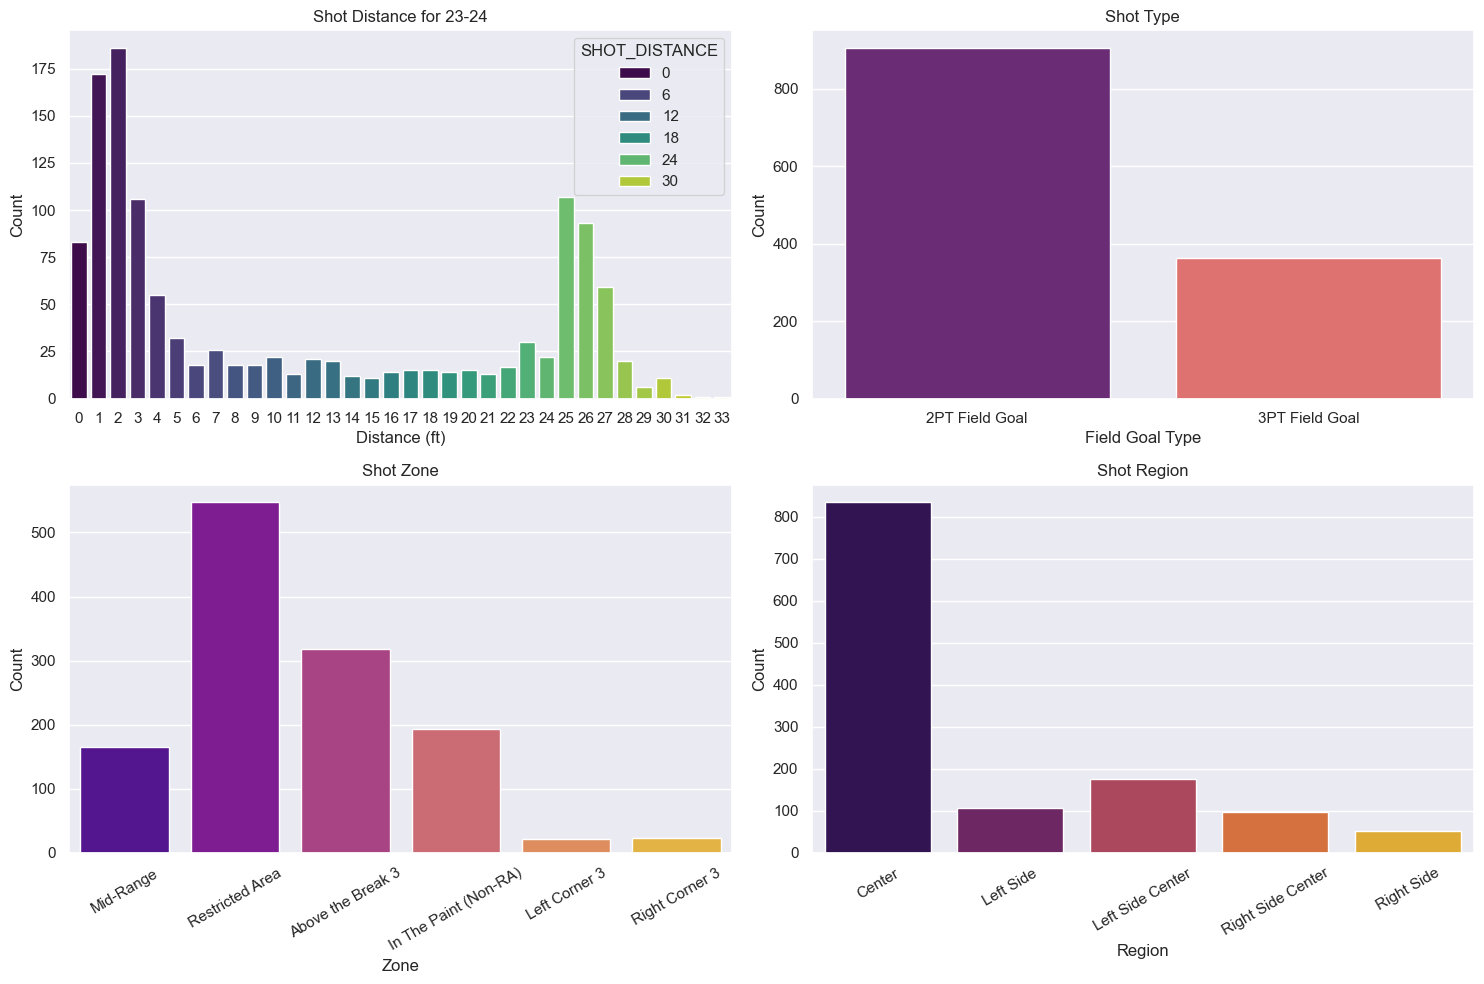

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.set_theme(style="darkgrid")

# DF of Bron's last full year
df = lebron_23

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.set_theme(style="darkgrid")

# Plot 1: Shot distance
sns.countplot(data=df, x="SHOT_DISTANCE", hue="SHOT_DISTANCE", palette='viridis', ax=ax[0, 0], edgecolor="white")
ax[0, 0].set_title('Shot Distance for 23-24')
ax[0, 0].set_xlabel('Distance (ft)')
ax[0, 0].set_ylabel('Count')

# Plot 2: Shot Type
sns.countplot(data=df, x="SHOT_TYPE", hue="SHOT_TYPE", palette='magma', ax=ax[0, 1], edgecolor="white")
ax[0, 1].set_title('Shot Type')
ax[0, 1].set_xlabel('Field Goal Type')
ax[0, 1].set_ylabel('Count')

# Plot 3: Shot Zone
sns.countplot(data=df, x="BASIC_ZONE", hue="BASIC_ZONE", palette='plasma', ax=ax[1, 0], edgecolor="white")
ax[1, 0].set_title('Shot Zone')
ax[1, 0].set_xlabel('Zone')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=30)

# Plot 4: Shot Region
sns.countplot(data=df, x="ZONE_NAME", hue="ZONE_NAME", palette='inferno', ax=ax[1, 1], edgecolor="white")
ax[1, 1].set_title('Shot Region')
ax[1, 1].set_xlabel('Region')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=30)

plt.tight_layout()


These two plots show LeBron's Field Goal Attempts for the two season. Upong comparing the two, it becomes evident that in recent years, this shot selection shows a heavy preference to 3Point Attempts over mid ranges. This trend is largely reflected across the league and is not limited to only LeBron.

### some more plots:
With enough plots to showcase individual player preferences through LeBron's case, let us now once again look at league wide preferences and how they have evolved over the years:

This plot below shows a percentage breakdown of FGAs by distance over the last 20 full seasons:

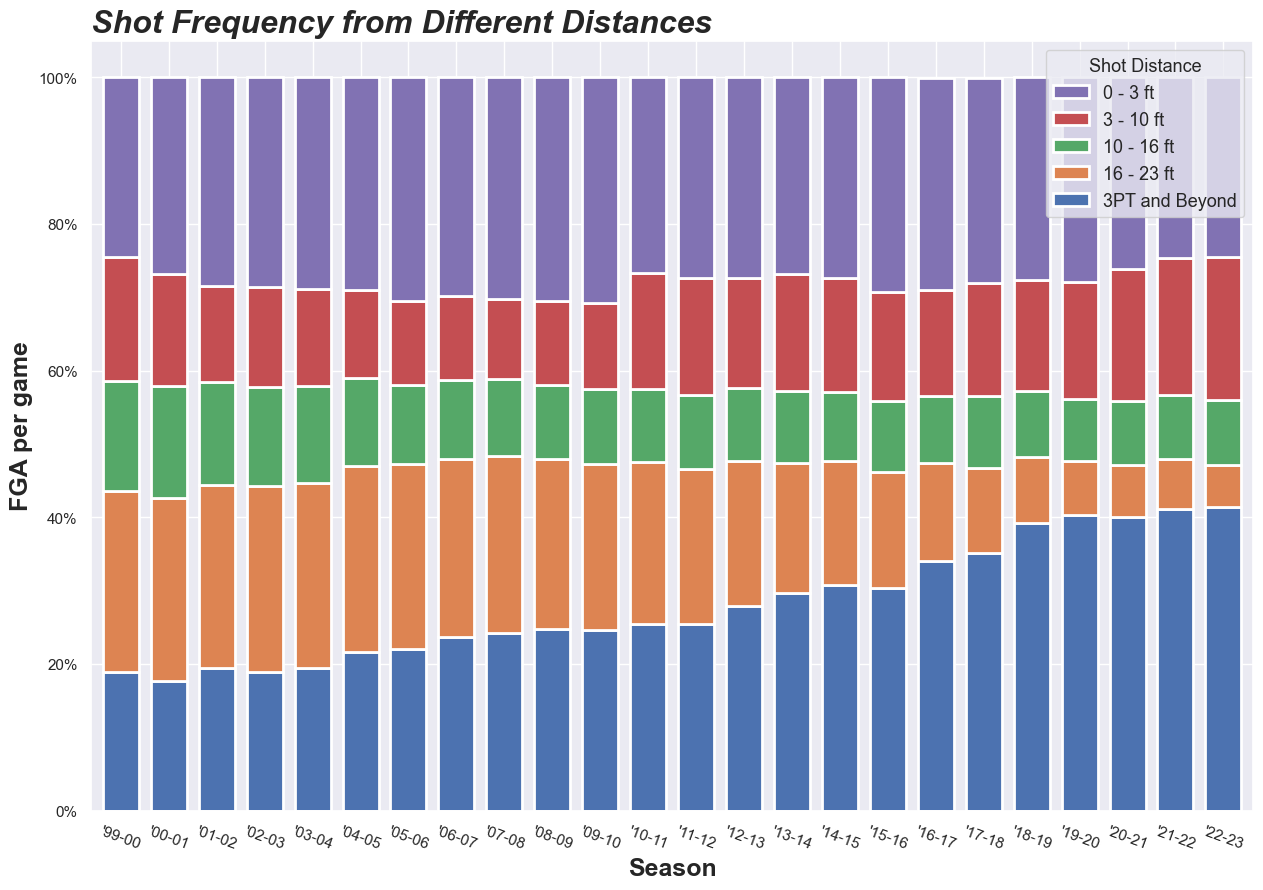

In [338]:
sns.set_theme(rc={"figure.figsize": (15, 10)})
sns.set_palette("tab10")
sns.set(font_scale=1)

# grouping by FGA
attempted = player_shooting.groupby('season')[
    ['percent_fga_from_x3p_range', 'percent_fga_from_x16_3p_range',
     'percent_fga_from_x10_16_range', 'percent_fga_from_x3_10_range',
     'percent_fga_from_x0_3_range']].mean().reset_index()

ax = attempted.set_index('season').plot(kind='bar', stacked=True, width=0.75, edgecolor="white", linewidth=2)
# format y labels as percentage:
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# format x label
ax.set_xticklabels([f"'{str(year)[-2:]}-{str(year+1)[-2:]}" for year in range(1999, 2023)], rotation=-20, size=11)

ax.set_title('Shot Frequency from Different Distances', fontsize=23, loc='left', fontweight='bold', fontstyle='oblique')
ax.set_xlabel("Season", fontsize=18, fontweight='bold')
ax.set_ylabel("FGA per game", fontsize=18, fontweight='bold')

handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles),
          reversed(["3PT and Beyond", "16 - 23 ft", "10 - 16 ft", "3 - 10 ft", "0 - 3 ft"]),
          title='Shot Distance', loc='upper right', title_fontsize=13, fontsize=13)


This plot above is an incredibly important plot showing the rise of 3-pointers (23+ feet) in FGAs and the cconsequent decrease in Mid-range shots (16-23 ft). The midrange was where many legends such as Michael Jordan and Dirk Nowitzki cemented their legacies, but in the modern game, the Mid-range shot is on pace to extinction. <hr>

# Section 7
<hr>
In this project, we explored the evolution of shot selection in the NBA, focusing on the significant rise in three-point attempts following the Warriors' dominant run starting with our first Championship in 2015. the primary goal here was to understand how modern gameplay has shifted towards a preference for three-point shots and layups, hailing them as "high percentage shots" and the subsequent move away from the Mid-range game, as well as the impact this trend has had on players' shot selection and success.

We analysed the shot selection of various players through a focus on LeBron James, who has been in the league for over 2 decades and has consistently evolved his game to keep up with the era. 
We compared Lebron's shot selectcion during the 2003-2004 and 2022-2023 seasons. The Gradient Boosting model demonstrated the highest accuracy (62.14%) and F1 Score (63.64%) for the 2022-2023 season, while the Random Forest model performed best for the 2003-2004 season with an accuracy of 61.93% and F1 Score of 52.67%. This is reflective as a whole on league-wide patterns in players' shooting efficiency and their adaptation to the evolving game of Basketball.

Key visualizations included scatter plots showing shot distances and FG attemps vs FGs Made. Additional bar plots illustrated the frequency of shots from different shot distances and zones. These visualizations revealed a significant increase in three-point attempts (23+ feet) and a consequent decrease in mid-range shots (16-23 ft) in recent seasons. The mid-range shot, once a hallmark of legends from Jordan to Kobe to Tim Duncan to Dirk Nowitzki, is now on the verge of extinction in the modern game.

to conclude everything, this project showed the evolution of shot selection in the NBA and the adjustments made by players to thrive in the modern era. Our findings through the case study of LeBron reflect the broader trends in the league, emphasizing the shift towards three-point shooting as a critical component of winning basketball. This analysis provides valuable insights into both individual performance and league-wide gameplay trends.


<h1 style="text-align: center; color: #FF5F05;">
    <span style="font-size: 200%;">Stat 107: Data Science Discovery</span>
    <br>
    <span style="font-size: 70%;">Thank you for sticking around till the end!</span>
</h1>

<div style="text-align: center; margin-top: 20px;">
    <hr style="border: none; height: 2px; background-color: #FF5F05;">
    <img src="https://yt3.googleusercontent.com/5cAY2OS3mKlw7aCjqQChwuP6ud2uWEmKwsc9S_3hNmwV3SYqRUXUWdHwSIf8pPgMUrN04ZXCUw=s900-c-k-c0x00ffffff-no-rj" alt="Illinois Fighting Illini Logo" style="width: 150px; margin-top: 20px;">
    <hr style="border: none; height: 2px; background-color: #FF5F05;">
</div>
